<a href="https://www.kaggle.com/sangitamule/machine-learning-project?scriptVersionId=89026854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Implement Clustering and then predict the class of car from “Car dataset”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/car-datacsv/car_data.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,...,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,...,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,...,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,...,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## Here we get to know count,mean,min,max,etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

## Here we can see that there are missing values in stroke and horsepower-binned

## Let's fill those missing values

In [6]:
np.mean(df.stroke)

3.2569035532994857

In [7]:
med=floor(df.stroke.median())

In [8]:
df.stroke = df.stroke.fillna(med)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [10]:
df.isnull()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Now here we can that now there are no missing values

# Here i am converting some of my categorical data into numerical ones

In [11]:
#in clus build our model on numerical

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
x1 = df["engine-type"]
y1 = label_encoder.fit_transform(x1)

In [14]:
df["New_engine_type"]=y1

In [15]:
label_encoder = LabelEncoder()
x2 = df["num-of-cylinders"]
y2 = label_encoder.fit_transform(x2)

In [16]:
df["New_no_of_cylinders"]=y2

In [17]:
label_encoder = LabelEncoder()
x3 = df["fuel-system"]
y3 = label_encoder.fit_transform(x3)

In [18]:
df["New_fuel_system"]=y3

In [19]:
label_encoder = LabelEncoder()
x4 = df["drive-wheels"]
y4 = label_encoder.fit_transform(x4)

In [20]:
df["New_drive_wheels"]=y4

In [21]:
label_encoder = LabelEncoder()
x5 = df["aspiration"]
y5 = label_encoder.fit_transform(x5)

In [22]:
df["New_aspiration"]=y5

In [23]:
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,price,city-L/100km,horsepower-binned,diesel,gas,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,13495.0,11.190476,Medium,0,1,0,2,5,2,0
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,16500.0,11.190476,Medium,0,1,0,2,5,2,0
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,16500.0,12.368421,Medium,0,1,4,3,5,2,0
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,13950.0,9.791667,Medium,0,1,2,2,5,1,0
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,17450.0,13.055556,Medium,0,1,2,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,16845.0,10.217391,Medium,0,1,2,2,5,2,0
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,19045.0,12.368421,High,0,1,2,2,5,2,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,21485.0,13.055556,Medium,0,1,4,3,5,2,0
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,22470.0,9.038462,Medium,1,0,2,3,3,2,1


## Now we can see in our original dataframe that there are some addditional features that has been created by updating categorical data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           201 non-null    int64  
 1   Unnamed: 0.1         201 non-null    int64  
 2   symboling            201 non-null    int64  
 3   normalized-losses    201 non-null    int64  
 4   make                 201 non-null    object 
 5   aspiration           201 non-null    object 
 6   num-of-doors         201 non-null    object 
 7   body-style           201 non-null    object 
 8   drive-wheels         201 non-null    object 
 9   engine-location      201 non-null    object 
 10  wheel-base           201 non-null    float64
 11  length               201 non-null    float64
 12  width                201 non-null    float64
 13  height               201 non-null    float64
 14  curb-weight          201 non-null    int64  
 15  engine-type          201 non-null    obj

# Here i am droping some of the features which i think will not be useful for our analysis

In [25]:
df.drop(df[['horsepower-binned','drive-wheels','engine-location','num-of-doors','make','body-style','engine-type','num-of-cylinders','fuel-system','aspiration']],axis=1,inplace=True)

In [26]:
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,highway-mpg,price,city-L/100km,diesel,gas,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,27,13495.0,11.190476,0,1,0,2,5,2,0
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,27,16500.0,11.190476,0,1,0,2,5,2,0
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,26,16500.0,12.368421,0,1,4,3,5,2,0
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,30,13950.0,9.791667,0,1,2,2,5,1,0
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,22,17450.0,13.055556,0,1,2,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,...,28,16845.0,10.217391,0,1,2,2,5,2,0
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,...,25,19045.0,12.368421,0,1,2,2,5,2,1
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,...,23,21485.0,13.055556,0,1,4,3,5,2,0
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,...,27,22470.0,9.038462,1,0,2,3,3,2,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           201 non-null    int64  
 1   Unnamed: 0.1         201 non-null    int64  
 2   symboling            201 non-null    int64  
 3   normalized-losses    201 non-null    int64  
 4   wheel-base           201 non-null    float64
 5   length               201 non-null    float64
 6   width                201 non-null    float64
 7   height               201 non-null    float64
 8   curb-weight          201 non-null    int64  
 9   engine-size          201 non-null    int64  
 10  bore                 201 non-null    float64
 11  stroke               201 non-null    float64
 12  compression-ratio    201 non-null    float64
 13  horsepower           201 non-null    float64
 14  peak-rpm             201 non-null    float64
 15  city-mpg             201 non-null    int

## Here we can see the change in our original dataframe

## Now we will seperate our classification feature and input feature

In [28]:
classification = df[['diesel','gas']]
Attributes = df.drop(columns=classification)

## Now we will analyse our classification feature using piechart

([<matplotlib.patches.Wedge at 0x7f70bbffeb10>,
 [Text(1.046692174973808, 0.3382831518840387, 'diesel'),
  Text(-1.046692190809984, -0.33828310288484104, 'gas')],
 [Text(0.570923004531168, 0.18451808284583926, '9.95%'),
  Text(-0.5709230131690821, -0.18451805611900418, '90.05%')])

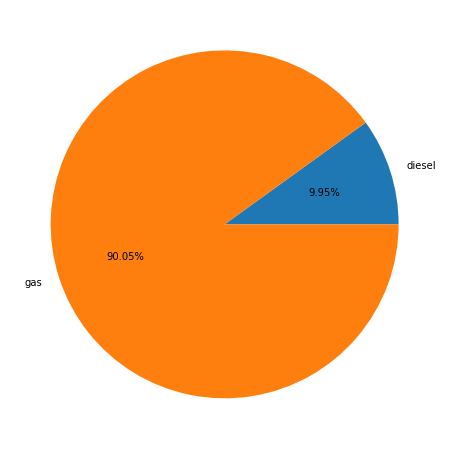

In [29]:
plt.subplots(figsize = ([8,8]))
plt.pie(x=classification.value_counts().sort_values(),autopct = '%.2f%%',labels=classification.columns)

## By analysing piechart we can come to know that most of the cars runs on gas

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Unnamed: 0.1'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'city-L/100km'}>,
  

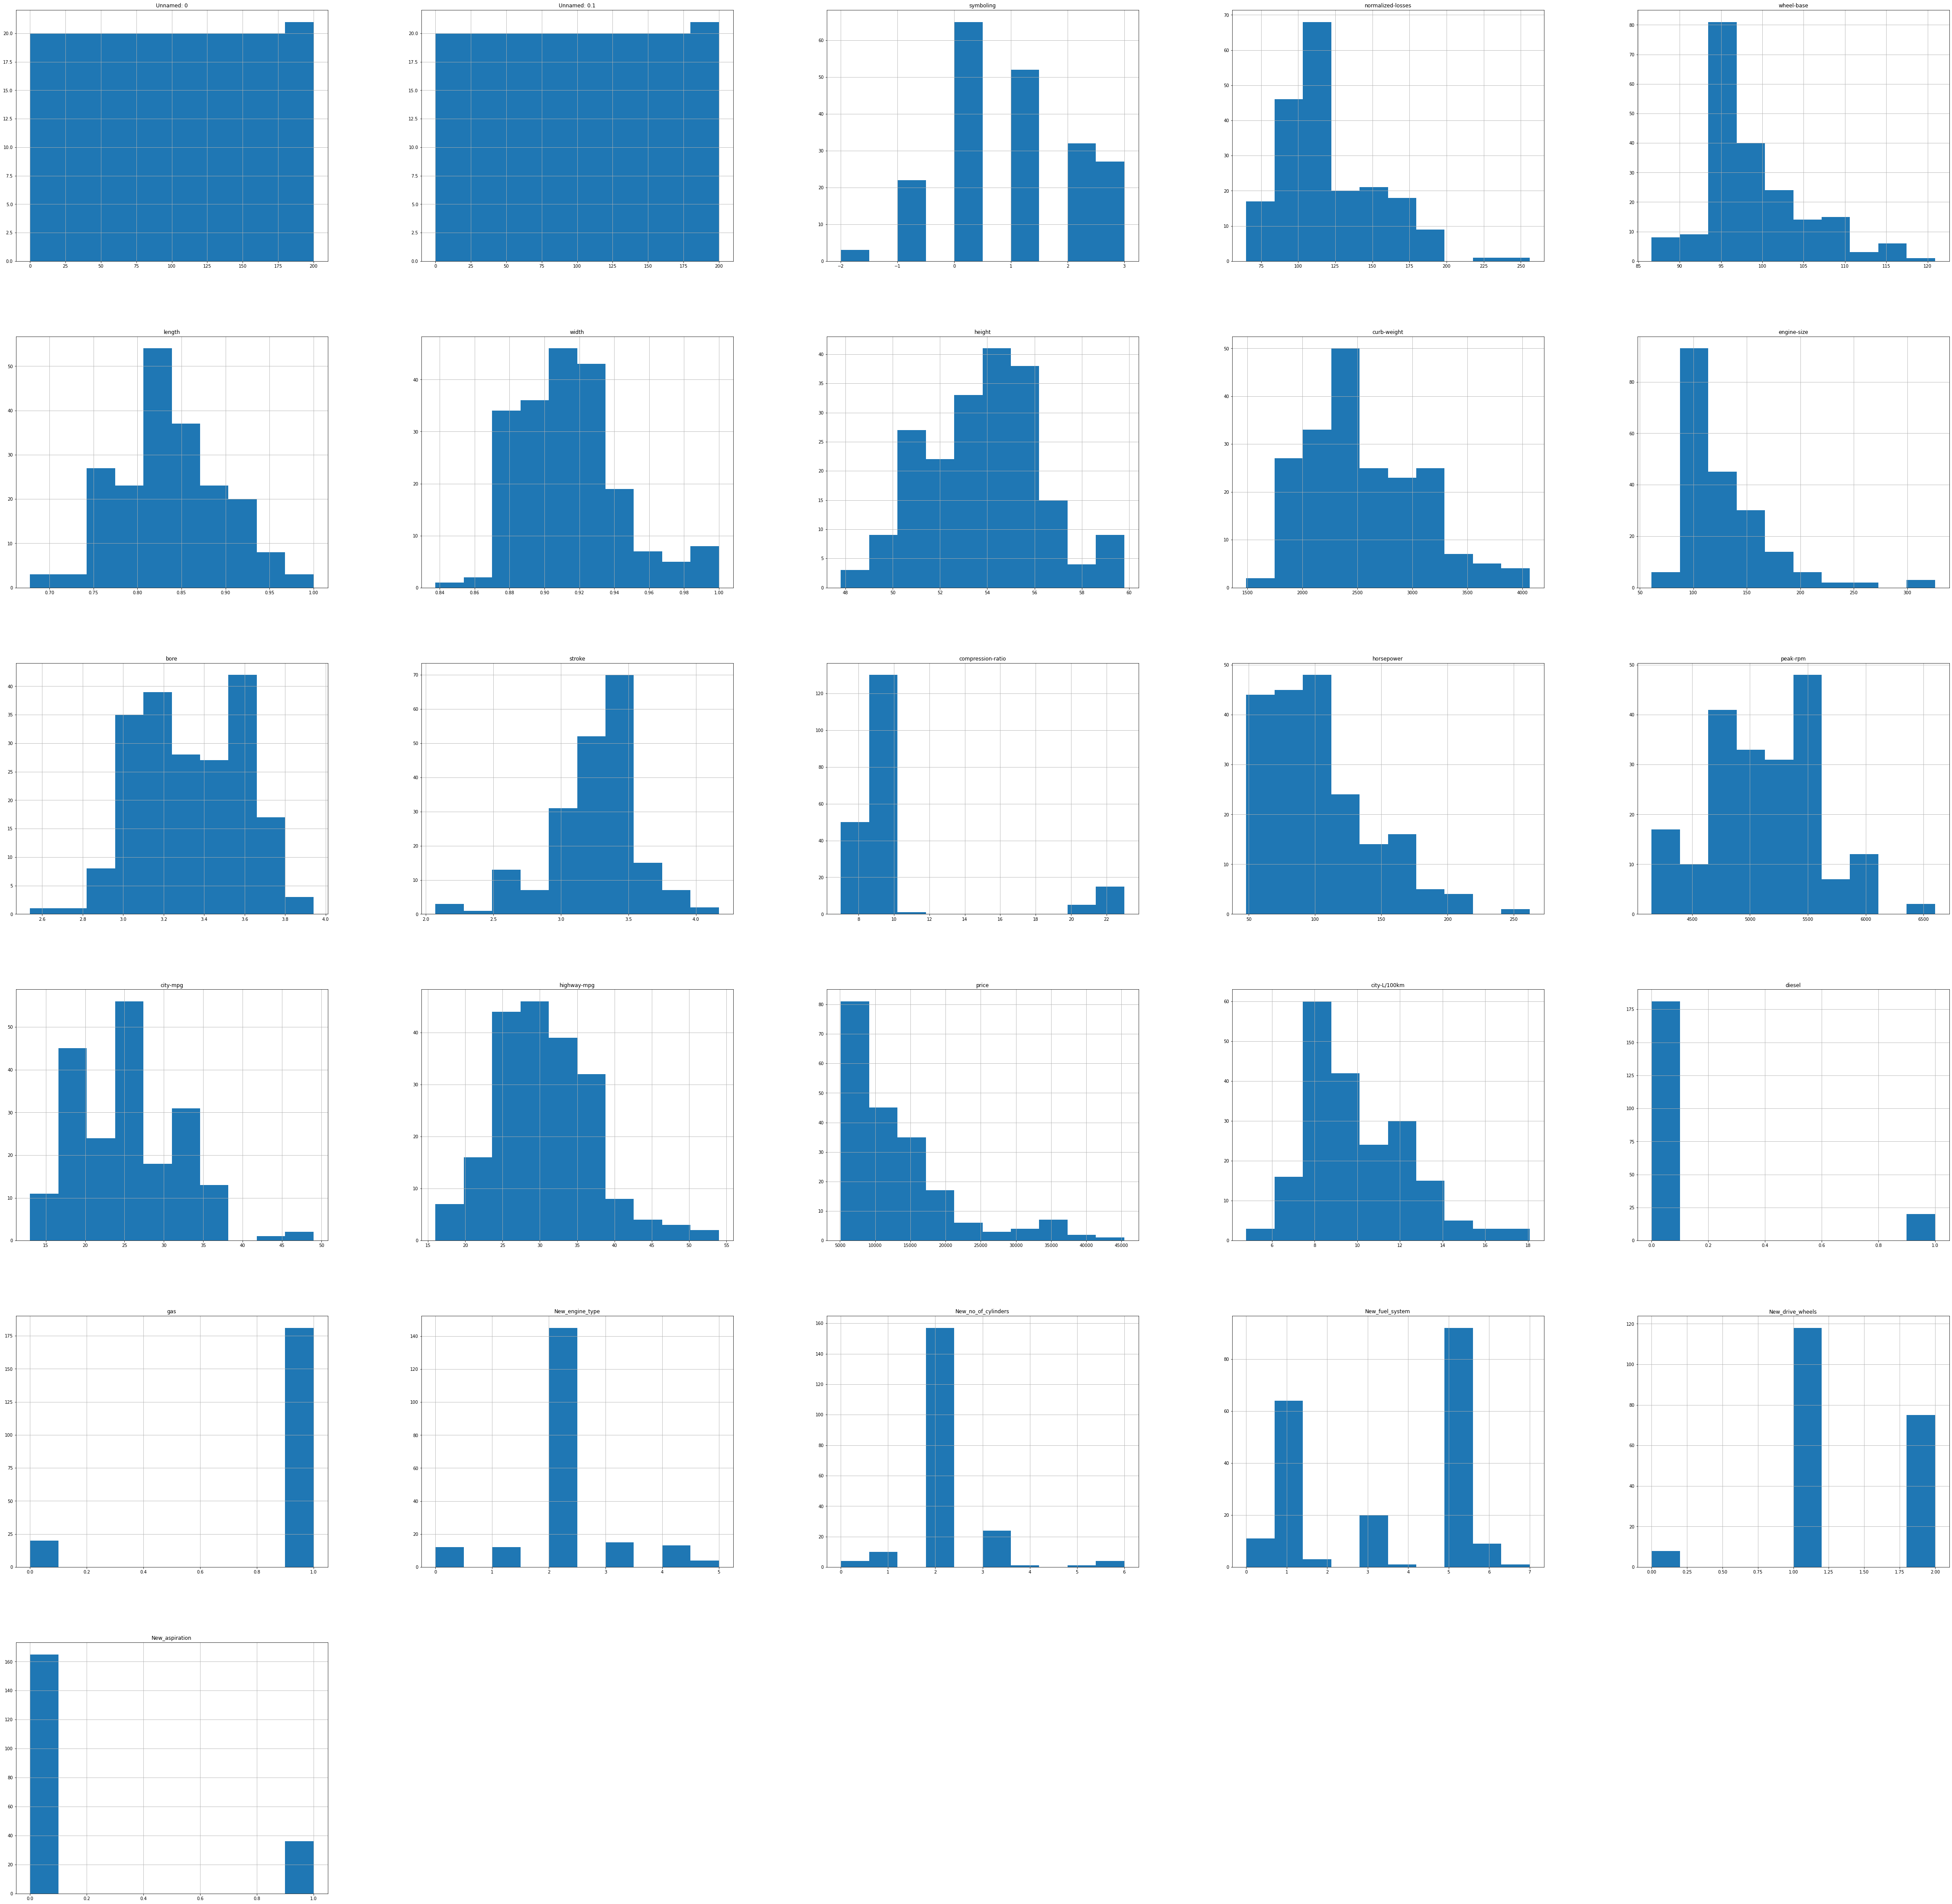

In [30]:
df.hist(figsize = ([80,80]))

## By looking at histograms:
### Most of the cars give MPG at highway is 24 to 38
### Most of the cars have the stroke from 3.0 to 3.5
### Most of the cars have width from 0.87 to 0.95
### Most of the cars price ranges from 5000 to 15000
### Most of cars have height ranges from 52-57

<AxesSubplot:>

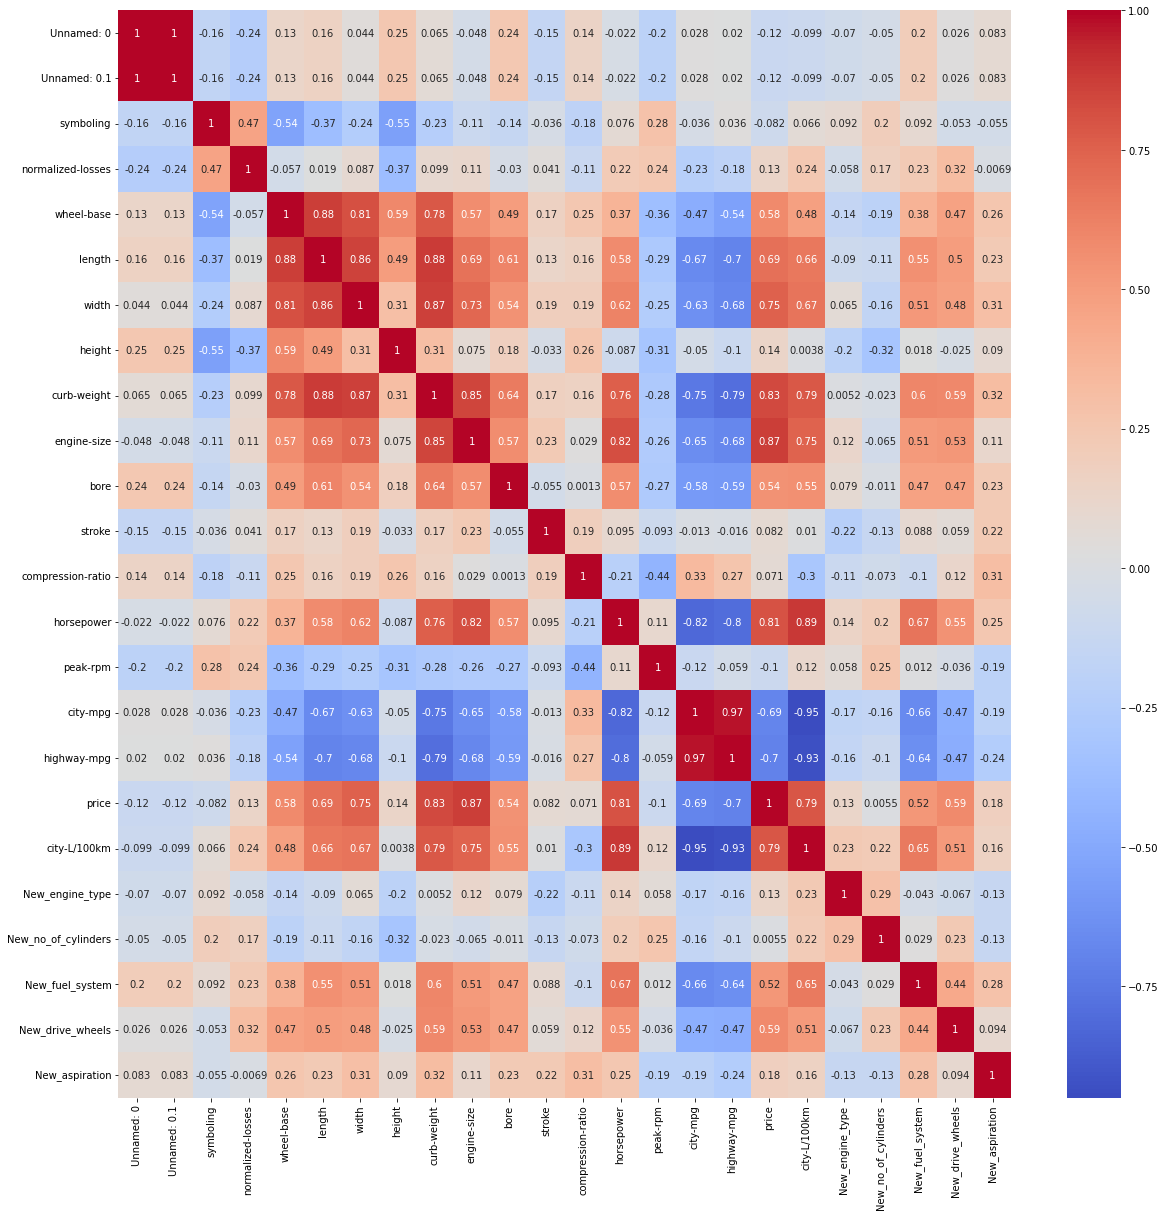

In [31]:
import seaborn as sn
plt.subplots(figsize = ([20,20]))
sn.heatmap(Attributes.corr(),cmap="coolwarm",annot=True)

## By visualizimg the heatmap
### highway MPG is highly correlated with City MPG
### length is highly correlated with wheel-base
### price is highly correlated with engine-size
### highway MPG is not at all correlated with curb weight
### city MPG is not at all correlated with City-L/100

## Let's see some of the correlation

<AxesSubplot:xlabel='curb-weight', ylabel='length'>

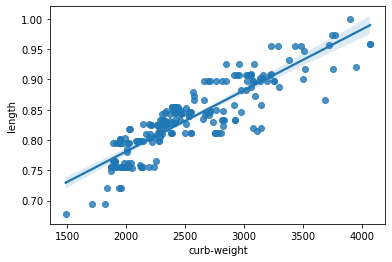

In [32]:
sn.regplot(x=df['curb-weight'],y=df['length'])

<AxesSubplot:xlabel='wheel-base', ylabel='length'>

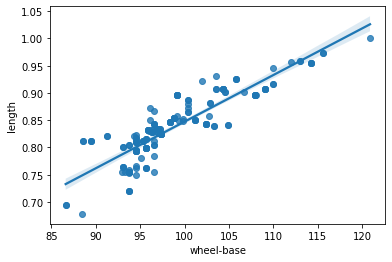

In [33]:
sn.regplot(x=df['wheel-base'],y=df['length'])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

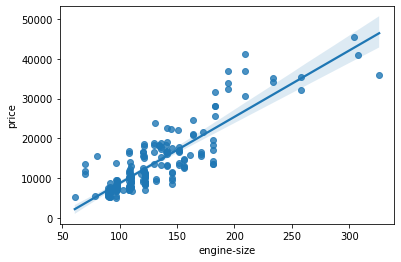

In [34]:
sn.regplot(x=df['engine-size'],y=df['price'])

<AxesSubplot:xlabel='highway-mpg', ylabel='city-mpg'>

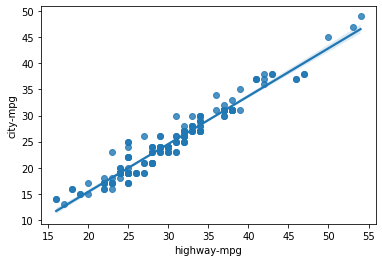

In [35]:
sn.regplot(x=df['highway-mpg'],y=df['city-mpg'])

# Let's find the skewness of the data

In [36]:
feature_skewness = pd.DataFrame(Attributes.skew())
feature_skewness.sort_values(ascending = False,by=0)

,0
compression-ratio,2.584462
New_no_of_cylinders,2.322379
engine-size,1.979144
price,1.809675
New_aspiration,1.686384
horsepower,1.146517
wheel-base,1.031261
width,0.875029
normalized-losses,0.846546
curb-weight,0.705804


## Let's visualize in a better way

<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

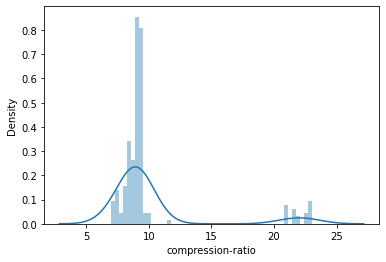

In [37]:
sn.distplot(df['compression-ratio'])

<AxesSubplot:xlabel='New_no_of_cylinders', ylabel='Density'>

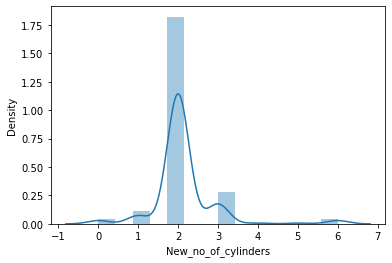

In [38]:
sn.distplot(df['New_no_of_cylinders'])

<AxesSubplot:xlabel='stroke', ylabel='Density'>

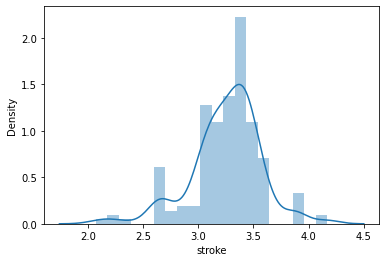

In [39]:
sn.distplot(df['stroke'])

<AxesSubplot:xlabel='New_fuel_system', ylabel='Density'>

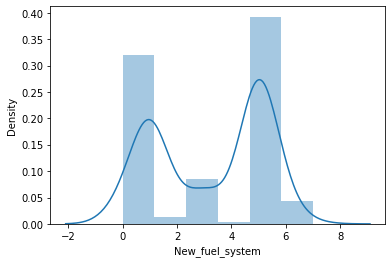

In [40]:
sn.distplot(df['New_fuel_system'])

# Now let's find outliers

<AxesSubplot:>

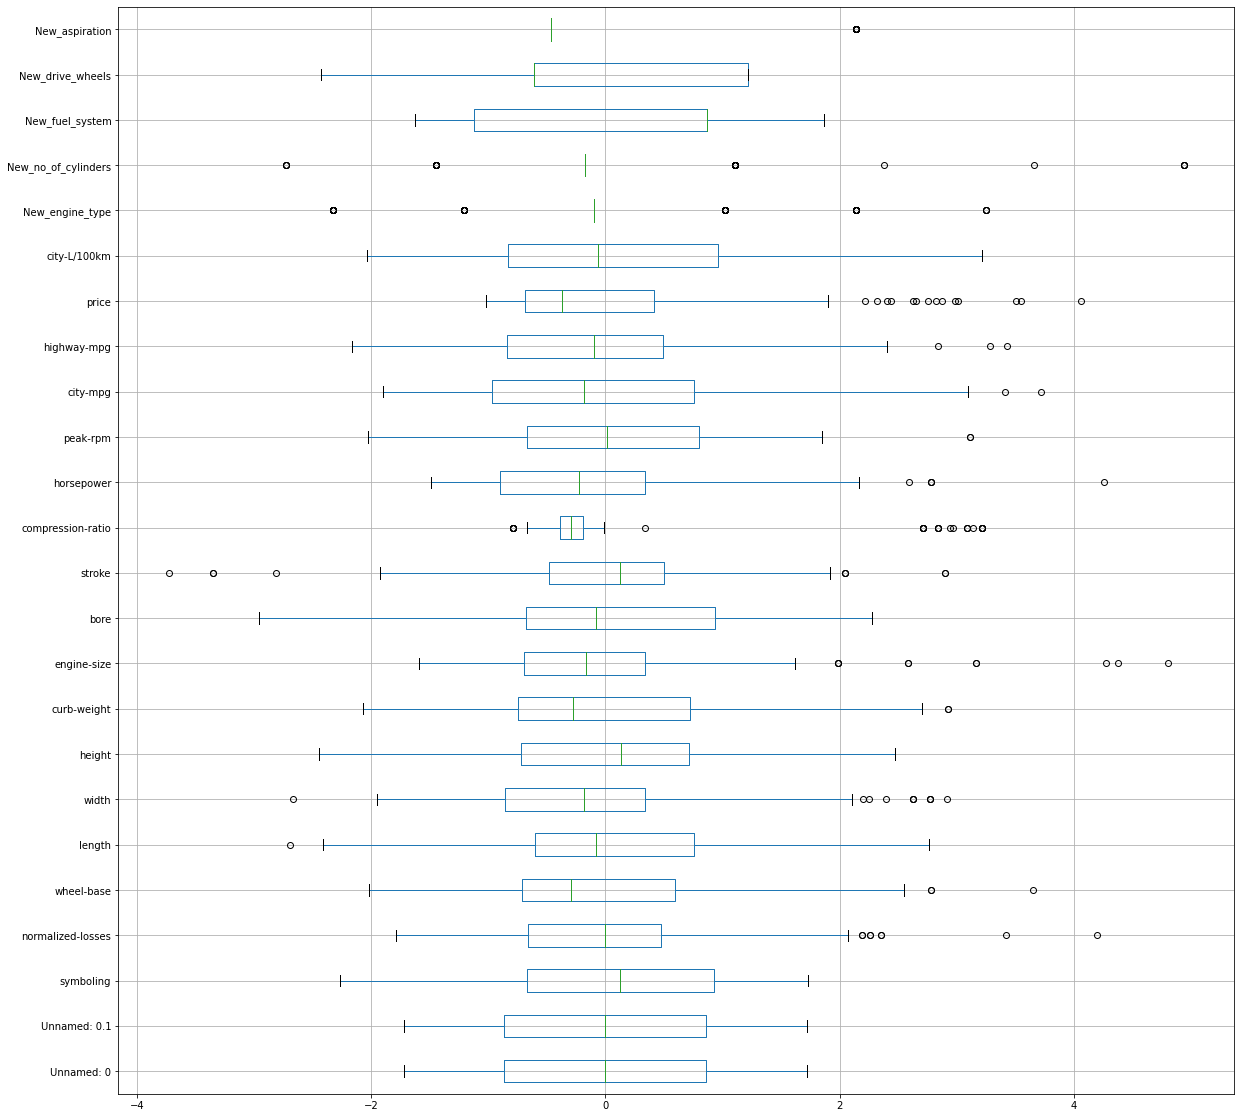

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Attributes_scaled = pd.DataFrame(scaler.fit_transform(Attributes),columns=Attributes.columns)
Attributes_scaled.boxplot(return_type = 'axes',figsize=(20,20),vert=False)

# By analysing boxplot :
## drive-wheels,fuel-system,horsepower-binned,height,symboling these data are well structured

# Summary:
## There were some missing values in the data 
## Most cars runs on gas
## There are some highly correlated data and some are not at all correlated
## Some of the datas are well structured
## Compression-ratio is most positive skewed data and stroke is most negative skewed data

In [42]:
Attributes_scaled

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,-1.723455,-1.723455,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,...,-0.246718,-0.652249,-0.542288,0.036314,0.492955,-2.325124,-0.171457,0.867123,1.213477,-0.467099
1,-1.706220,-1.706220,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,...,-0.246718,-0.652249,-0.542288,0.415385,0.492955,-2.325124,-0.171457,0.867123,1.213477,-0.467099
2,-1.688986,-1.688986,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,...,-0.246718,-0.964397,-0.689386,0.415385,0.958861,2.136451,1.104946,0.867123,1.213477,-0.467099
3,-1.671751,-1.671751,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,...,0.801670,-0.184027,-0.100993,0.093711,-0.060309,-0.094337,-0.171457,0.867123,-0.606739,-0.467099
4,-1.654517,-1.654517,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,...,0.801670,-1.120471,-1.277779,0.535224,1.230640,-0.094337,-1.447860,0.867123,-2.426955,-0.467099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.654517,1.654517,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.768075,0.340812,...,0.591992,-0.340101,-0.395189,0.458906,0.108076,-0.094337,-0.171457,0.867123,1.213477,-0.467099
197,1.671751,1.671751,-1.470664,-0.845956,1.702619,1.187733,1.388653,0.709881,0.956057,0.340812,...,0.382315,-0.964397,-0.836484,0.736429,0.958861,-0.094337,-0.171457,0.867123,1.213477,2.140872
198,1.688986,1.688986,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.884353,1.112950,...,0.801670,-1.120471,-1.130681,1.044227,1.230640,2.136451,1.104946,0.867123,1.213477,-0.467099
199,1.706220,1.706220,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,1.281633,0.437329,...,-0.666073,0.128120,-0.542288,1.168481,-0.358220,-0.094337,1.104946,-0.128830,1.213477,2.140872


# Applying our unsupervised learning (KMeans)

In [43]:
from sklearn.cluster import KMeans

[4824.000000000004, 3530.70722286673, 3090.959399705791, 2813.8166126329807, 2576.24847546643, 2397.816302909629, 2196.4436127231606, 2048.9118536283095, 1942.863185498739]


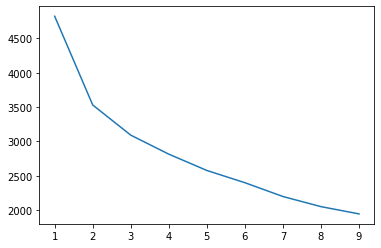

In [44]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(Attributes_scaled)
    sse.append(km.inertia_)
    
print(sse)
plt.plot(k_range,sse)
plt.show()

## By looking at the elbow curve we can see our optimal solution is at k=2

In [45]:
KM = KMeans(n_clusters=2)
Y = KM.fit_predict(Attributes_scaled)


In [46]:
Y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [47]:
df["Clustered_output"]=Y

In [48]:
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,price,city-L/100km,diesel,gas,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration,Clustered_output
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,13495.0,11.190476,0,1,0,2,5,2,0,0
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,16500.0,11.190476,0,1,0,2,5,2,0,0
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,16500.0,12.368421,0,1,4,3,5,2,0,0
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,13950.0,9.791667,0,1,2,2,5,1,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,17450.0,13.055556,0,1,2,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,...,16845.0,10.217391,0,1,2,2,5,2,0,0
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,...,19045.0,12.368421,0,1,2,2,5,2,1,0
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,...,21485.0,13.055556,0,1,4,3,5,2,0,0
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,...,22470.0,9.038462,1,0,2,3,3,2,1,0


In [49]:
df0=df[df.Clustered_output==0]
df1=df[df.Clustered_output==1]

In [50]:
df0

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,price,city-L/100km,diesel,gas,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration,Clustered_output
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,13495.0,11.190476,0,1,0,2,5,2,0,0
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,16500.0,11.190476,0,1,0,2,5,2,0,0
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,16500.0,12.368421,0,1,4,3,5,2,0,0
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,17450.0,13.055556,0,1,2,1,5,0,0,0
5,5,5,2,122,99.8,0.851994,0.920833,53.1,2507,136,...,15250.0,12.368421,0,1,2,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,...,16845.0,10.217391,0,1,2,2,5,2,0,0
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,...,19045.0,12.368421,0,1,2,2,5,2,1,0
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,...,21485.0,13.055556,0,1,4,3,5,2,0,0
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,...,22470.0,9.038462,1,0,2,3,3,2,1,0


In [51]:
df1

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,price,city-L/100km,diesel,gas,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration,Clustered_output
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,13950.0,9.791667,0,1,2,2,5,1,0,1
17,17,17,2,121,88.4,0.678039,0.837500,53.2,1488,61,...,5151.0,5.000000,0,1,1,4,1,1,0,1
18,18,18,1,98,94.5,0.749159,0.883333,52.0,1874,90,...,6295.0,6.184211,0,1,2,2,1,1,0,1
19,19,19,0,81,94.5,0.763095,0.883333,52.0,1909,90,...,6575.0,6.184211,0,1,2,2,1,1,0,1
20,20,20,1,118,93.7,0.755887,0.886111,50.8,1876,90,...,5572.0,6.351351,0,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,184,184,2,94,97.3,0.825084,0.909722,55.7,2300,109,...,9995.0,9.038462,0,1,2,2,5,1,0,1
185,185,185,3,122,94.5,0.765497,0.891667,55.6,2254,109,...,11595.0,9.791667,0,1,2,2,5,1,0,1
186,186,186,3,256,94.5,0.796252,0.888889,51.4,2221,109,...,9980.0,9.791667,0,1,2,2,5,1,0,1
188,188,188,0,122,100.4,0.865930,0.929167,55.1,2579,97,...,13845.0,7.121212,1,0,2,2,3,1,1,1


## By looking above we can see that 89 cars comes under class 0 and 112 cars comes under class 1

# Let's observe two different clusters by seperating it into two different dataframes

# Now here we are not considering our original target , we are considering our new target variable i.e. Clustered_output

In [52]:
New_Target=[]
New_Target = df['Clustered_output']

# Here i am splitting my data

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Attributes_scaled,New_Target,test_size=0.3,random_state=4)

In [54]:
len(x_train)

140

In [55]:
len(x_test)

61

# Applying different algorithms

In [56]:
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Linear Regression

In [57]:
model1 = linear_model.LinearRegression()
model1.fit(x_train,y_train)
model1.fit(x_test,y_test)
model1_pred = model1.predict(x_test)

In [58]:
model1.score(x_test,y_test)
 

0.8969830582632287

### Logistic Regression

In [59]:
model2 = linear_model.LogisticRegression()
model2.fit(x_train,y_train)
model2_pred = model2.predict(x_test)

In [60]:
model2.score(x_test,y_test)

1.0

### Decision Tree

In [61]:
model3=tree.DecisionTreeClassifier()
model3.fit(x_train,y_train)
model3_pred = model3.predict(x_test)

In [62]:
model3.score(x_test,y_test)

0.9508196721311475

### Random Forest

In [63]:
model4=ensemble.RandomForestClassifier(n_estimators=20)
model4.fit(x_train,y_train)
model4_pred = model4.predict(x_test)

In [64]:
model4.score(x_test,y_test)

0.9836065573770492

### SVM

In [65]:
model5 = svm.SVC(C=1,gamma="auto",kernel="linear")
model5.fit(x_train,y_train)
model5_pred = model5.predict(x_test)

In [66]:
model5.score(x_test,y_test)

1.0

### KNN

In [67]:
model6 = KNeighborsClassifier(n_neighbors=4)
model6.fit(x_train,y_train)
model6_pred = model6.predict(x_test)

In [68]:
model6.score(x_test,y_test)

0.9180327868852459

## By looking above we can check scores for each algorithm.

## But for better visualisation i have created a new dataframe depending upon the accuracy score for each model

In [69]:
dict1={'Models':('Linear Regression','Logistic Regression','Decision Tree','Random Forest','SVM','KNN'),'Accuracy%':(78,100,98,98,98,100)}
New_df=pd.DataFrame(dict1)

In [70]:
New_df

,Models,Accuracy%
0,Linear Regression,78
1,Logistic Regression,100
2,Decision Tree,98
3,Random Forest,98
4,SVM,98
5,KNN,100


## For better visualisation let's plot a barplot

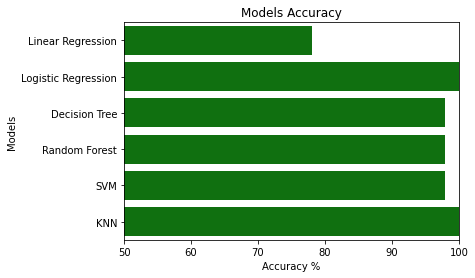

In [71]:
sn.barplot(New_df['Accuracy%'],New_df['Models'], color="g")
plt.xlim([50,100])
plt.xlabel('Accuracy %')
plt.title('Models Accuracy')
plt.show()

# Here i come to the conclusion that for given dataset using our new target(Clustered_output) apart from Linear Regression all the other supervised learning algorithm will work in effecient way

# Project is succesefully completed.